# Final Project: Tobacco Consumption

**Wave 2 - Group 4 - Team 4** <br>
Team Members:
* Saúl Yael Puente Ruiz
* Ana Mónica Lizette Turcios Esquivel

## Import Python Modules

In [1]:
# Data Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Machine Learning Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preparation

As a first step we import the dataset and take a look at the data.

In [3]:
TobaccoConsumptionDF = pd.read_csv("https://raw.githubusercontent.com/SaulPuente/Tobacco-Consumption/main/Tobacco_Consumption.csv")
TobaccoConsumptionDF.head()

,Year,LocationAbbrev,LocationDesc,Population,Topic,Measure,Submeasure,Data Value Unit,Domestic,Imports,Total,Domestic Per Capita,Imports Per Capita,Total Per Capita
0,2000,US,National,209786736,Noncombustible Tobacco,Smokeless Tobacco,Chewing Tobacco,Pounds,4.550216e+07,91965,4.559412e+07,0.217,0.0,0.217
1,2000,US,National,209786736,Combustible Tobacco,Cigarettes,Cigarette Removals,Cigarettes,4.232500e+11,12319663000,4.355700e+11,2018.000,59.0,2076.000
2,2000,US,National,209786736,Combustible Tobacco,Cigars,Total Cigars,Cigars,5.612867e+09,548243000,6.161110e+09,27.000,3.0,29.000
3,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Cigarette Equivalents,8.291277e+09,702741662,8.994018e+09,40.000,3.0,43.000
4,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Pounds,1.684166e+07,1427444,1.826910e+07,0.000,0.0,0.000


This dataset contains information about the tobaccoo consumption in the US along 20 years. <br>
We know this about the variables in the dataset:
- Year: Year in which the information was obtained.
- LocationAbbrev: Place in which the information was obtained.
- LocationDesc: Brief description about the location.	
- Population: National population at that year.
- Topic: Type of tobacco (Combustible / Noncombustible)
- Measure: Kind of tobacco.
- Submeasure: More specific kind of tobacco.
- Data value unit: The data value unit in which the consumption was measured.
- Domestic: Amount of tobacco produced in the US.
- Imports: Amount of imported tobacco.
- Total: Total tobacco consumption (Domestic + Imports).
- Domestic Per Capita: Amount of tobacco produced in the US per person (Domestic / Population).
- Imports Per Capita: Amount of imported tobacco per person (Imports / Population).
- Total Per Capita: Total tobacco consumption per person (Total / Population).

In [4]:
len(pd.unique(TobaccoConsumptionDF['LocationAbbrev'])), len(pd.unique(TobaccoConsumptionDF['LocationDesc']))

(1, 1)

As we can see, the values of 'LocationAbbrev' and 'LocationDesc' do not change, so we can ignore both columns.

In [5]:
TobaccoConsumptionDF = TobaccoConsumptionDF.drop(['LocationAbbrev', 'LocationDesc'], axis=1)
TobaccoConsumptionDF.head()

,Year,Population,Topic,Measure,Submeasure,Data Value Unit,Domestic,Imports,Total,Domestic Per Capita,Imports Per Capita,Total Per Capita
0,2000,209786736,Noncombustible Tobacco,Smokeless Tobacco,Chewing Tobacco,Pounds,4.550216e+07,91965,4.559412e+07,0.217,0.0,0.217
1,2000,209786736,Combustible Tobacco,Cigarettes,Cigarette Removals,Cigarettes,4.232500e+11,12319663000,4.355700e+11,2018.000,59.0,2076.000
2,2000,209786736,Combustible Tobacco,Cigars,Total Cigars,Cigars,5.612867e+09,548243000,6.161110e+09,27.000,3.0,29.000
3,2000,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Cigarette Equivalents,8.291277e+09,702741662,8.994018e+09,40.000,3.0,43.000
4,2000,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Pounds,1.684166e+07,1427444,1.826910e+07,0.000,0.0,0.000


Now we get some information from the data

In [6]:
TobaccoConsumptionDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,273.0,2.010000e+03,6.066422e+00,2000.0,2.005000e+03,2.010000e+03,2.015000e+03,2.020000e+03
Population,273.0,2.345479e+08,1.478622e+07,209786736.0,2.220040e+08,2.351539e+08,2.477737e+08,2.566620e+08
Domestic,273.0,5.243527e+10,1.169688e+11,1724585.0,3.753697e+07,2.301972e+09,1.014369e+10,4.371540e+11
Imports,273.0,3.069286e+09,5.670711e+09,8369.0,1.439423e+06,3.111990e+08,2.412132e+09,2.473305e+10
Total,273.0,5.550452e+10,1.220794e+11,1926881.0,4.035802e+07,2.621590e+09,1.335493e+10,4.507250e+11
Domestic Per Capita,273.0,2.266501e+02,5.150564e+02,0.0,9.900000e-02,1.100000e+01,4.400000e+01,2.084000e+03
Imports Per Capita,273.0,1.331767e+01,2.556359e+01,0.0,0.000000e+00,1.000000e+00,1.000000e+01,1.280000e+02
Total Per Capita,273.0,2.400120e+02,5.378684e+02,0.0,1.010000e-01,1.100000e+01,5.400000e+01,2.148000e+03


and verify if there are missing values.

In [7]:
TobaccoConsumptionDF.isnull().sum()

Year                   0
Population             0
Topic                  0
Measure                0
Submeasure             0
Data Value Unit        0
Domestic               0
Imports                0
Total                  0
Domestic Per Capita    0
Imports Per Capita     0
Total Per Capita       0
dtype: int64

## Data Analysis and Visualization

#### % Per Capita by type of contribution (domestic or imports)

In [8]:
TobaccoConsumptionByMeasureDF = TobaccoConsumptionDF[['Measure', 'Domestic Per Capita', 
                                                      'Imports Per Capita', 'Total Per Capita']].groupby(['Measure'])

In [9]:
aux1 = TobaccoConsumptionDF[['Measure', 'Domestic Per Capita', 
            'Imports Per Capita', 'Total Per Capita']].set_index('Measure').sort_index().sum(level='Measure')
aux2 = TobaccoConsumptionDF[['Measure', 'Total Per Capita']].set_index('Measure').sort_index().sum(level='Measure').values.tolist()
aux2 = [i[0] for i in aux2]
aux3 = [sum(aux2) for i in range(5)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
auxDF = pd.DataFrame({"Measure": aux1.index,
                   "Total Per Capita": aux3,
                  "Domestic Per Capita": aux2,
                  "Imports Per Capita": aux2}).set_index('Measure')
auxDF.head()

,Total Per Capita,Domestic Per Capita,Imports Per Capita
Measure,,,
All Combustibles,65523.282,31586.000,31586.000
Cigarettes,65523.282,29249.000,29249.000
Cigars,65523.282,1967.161,1967.161
Loose Tobacco,65523.282,2710.116,2710.116
Smokeless Tobacco,65523.282,11.005,11.005


In [11]:
TobaccoConsumptionByMeasureDF = np.round(aux1/auxDF*100,2)
TobaccoConsumptionByMeasureDF

,Domestic Per Capita,Imports Per Capita,Total Per Capita
Measure,,,
All Combustibles,94.83,5.16,48.21
Cigarettes,96.20,3.79,44.64
Cigars,68.64,31.46,3.00
Loose Tobacco,89.38,10.29,4.14
Smokeless Tobacco,98.73,0.57,0.02


Text(0, 0.5, 'Domestic Per Capita')

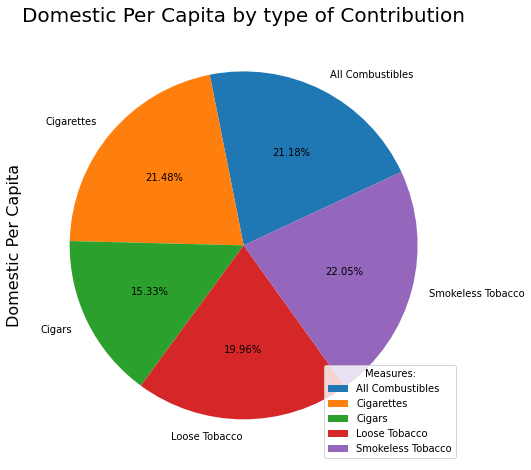

In [12]:
TobaccoConsumptionByMeasureDF.plot.pie(y="Domestic Per Capita", autopct='%1.2f%%', figsize=(8, 8), startangle=25)
plt.legend(loc="lower right", title = "Measures:")
plt.title("Domestic Per Capita by type of Contribution", fontsize=20)
plt.ylabel("Domestic Per Capita", fontsize=16)

Text(0, 0.5, 'Imports Per Capita')

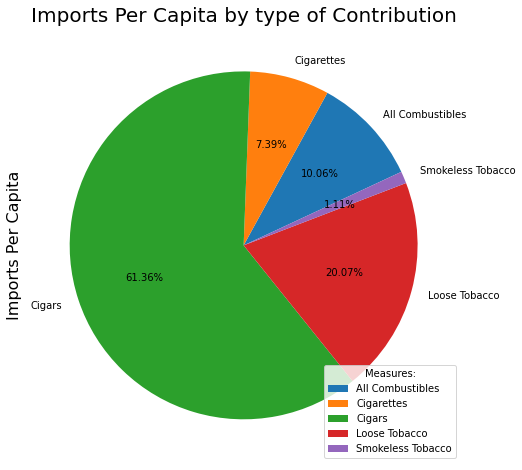

In [13]:
TobaccoConsumptionByMeasureDF.plot.pie(y="Imports Per Capita", autopct='%1.2f%%', figsize=(8, 8), startangle=25)
plt.legend(loc="lower right", title = "Measures:")
plt.title("Imports Per Capita by type of Contribution", fontsize=20)
plt.ylabel("Imports Per Capita", fontsize=16)

Text(0, 0.5, 'Total Per Capita')

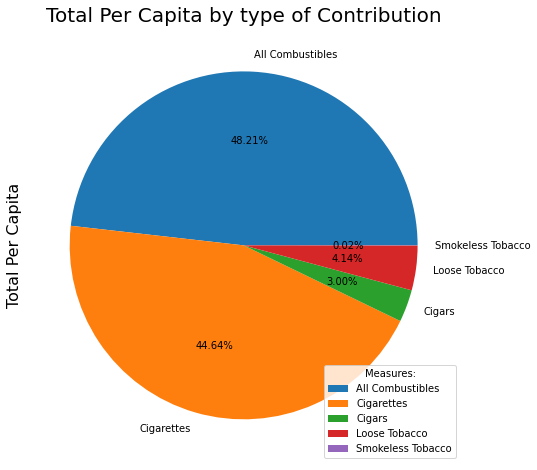

In [14]:
TobaccoConsumptionByMeasureDF.plot.pie(y="Total Per Capita", autopct='%1.2f%%', figsize=(8, 8))
plt.legend(loc="lower right", title = "Measures:")
plt.title("Total Per Capita by type of Contribution", fontsize=20)
plt.ylabel("Total Per Capita", fontsize=16)

In [15]:
TobaccoConsumptionByMeasureDF.loc['Total General']= TobaccoConsumptionDF[['Domestic Per Capita', 'Imports Per Capita', 'Total Per Capita']].sum(axis=0).values.tolist()
TobaccoConsumptionByMeasureDF

,Domestic Per Capita,Imports Per Capita,Total Per Capita
Measure,,,
All Combustibles,94.830,5.160,48.210
Cigarettes,96.200,3.790,44.640
Cigars,68.640,31.460,3.000
Loose Tobacco,89.380,10.290,4.140
Smokeless Tobacco,98.730,0.570,0.020
Total General,61875.483,3635.724,65523.282


#### DISTRIBUTION OF TOTAL AVERAGE PerCapita BY SUBMEASURES,YEARS 2000-2020 

In [16]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
TobaccoConsumptionDFBySubmeasure = TobaccoConsumptionDF[['Year','Topic','Measure','Submeasure','Total Per Capita']].set_index(["Year", "Topic", "Measure", "Submeasure"]).sort_index()
TobaccoConsumptionDFBySubmeasure

Total Per Capita
Year Topic                  Measure           Submeasure                                 
2000 Combustible Tobacco    All Combustibles  Total Combustible Tobacco          2148.000
                            Cigarettes        Cigarette Removals                 2076.000
                            Cigars            Large Cigars                         19.000
                                              Small Cigars                         11.000
                                              Total Cigars                         29.000
                            Loose Tobacco     Pipe Tobacco                          0.000
                                              Pipe Tobacco                         14.000
                                              Roll-Your-Own Tobacco                29.000
                                              Roll-Your-Own Tobacco                 0.000
                                              Total Loose Tobacco                  43.000
                                              Total Loose Tobacco                   0.000
     Noncombustible Tobacco Smokeless Tobacco Chewing Tobacco                       0.217
                                              Snuff                                 0.315
2001 Combustible Tobacco    All Combustibles  Total Combustible Tobacco          2075.000
                            Cigarettes        Cigarette Removals                 2010.000
                            Cigars            Large Cigars                         19.000
                                              Small Cigars                         11.000
                                              Total Cigars                         30.000
                            Loose Tobacco     Pipe Tobacco                         14.000
                                              Pipe Tobacco                          0.000
                                              Roll-Your-Own Tobacco                 0.000
                                              Roll-Your-Own Tobacco                22.000
                                              Total Loose Tobacco                   0.000
                                              Total Loose Tobacco                  36.000
     Noncombustible Tobacco Smokeless Tobacco Chewing Tobacco                       0.233
                                              Snuff                                 0.329
2002 Combustible Tobacco    All Combustibles  Total Combustible Tobacco          2006.000
                            Cigarettes        Cigarette Removals                 1936.000
                            Cigars            Large Cigars                         20.000
                                              Small Cigars                         11.000
                                              Total Cigars                         30.000
                            Loose Tobacco     Pipe Tobacco                          0.000
                                              Pipe Tobacco                         13.000
                                              Roll-Your-Own Tobacco                 0.000
                                              Roll-Your-Own Tobacco                27.000
                                              Total Loose Tobacco                   0.000
                                              Total Loose Tobacco                  40.000
     Noncombustible Tobacco Smokeless Tobacco Chewing Tobacco                       0.220
                                              Snuff                                 0.332
2003 Combustible Tobacco    All Combustibles  Total Combustible Tobacco          1916.000
                            Cigarettes        Cigarette Removals                 1844.000
                            Cigars            Large Cigars                         21.000
                                              Small Cigars                         11.000
                       

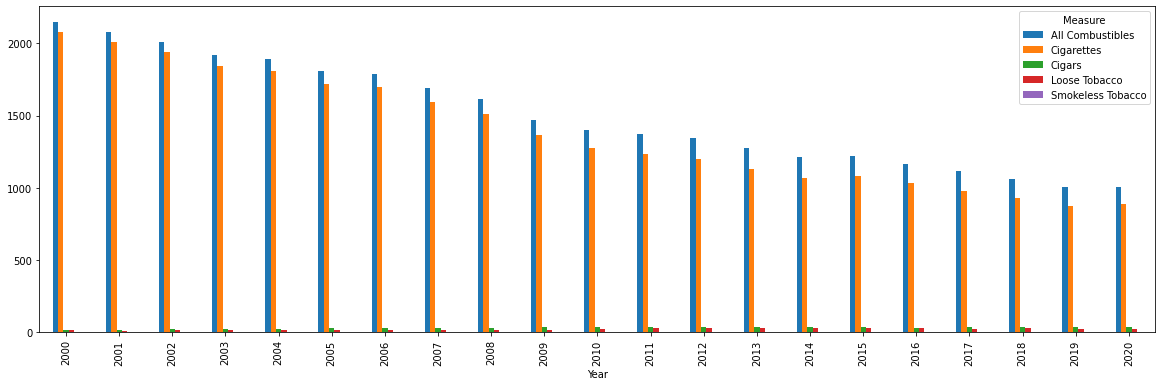

In [17]:
TobaccoConsumptionDF[['Year','Measure','Total Per Capita']].pivot_table(index='Year',columns='Measure', values='Total Per Capita').plot(kind='bar',figsize=(20, 6))

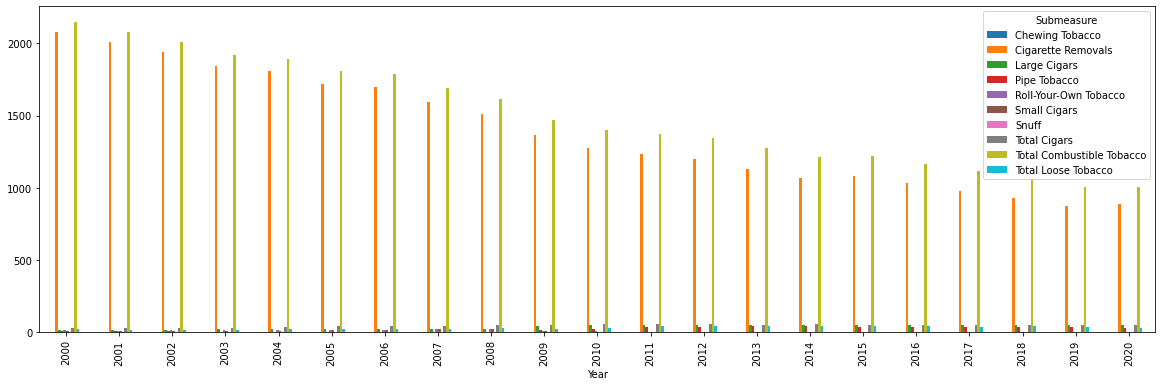

In [18]:
TobaccoConsumptionDF[['Year','Submeasure','Total Per Capita']].pivot_table(index='Year',columns='Submeasure', values='Total Per Capita').plot(kind='bar',figsize=(20, 6))

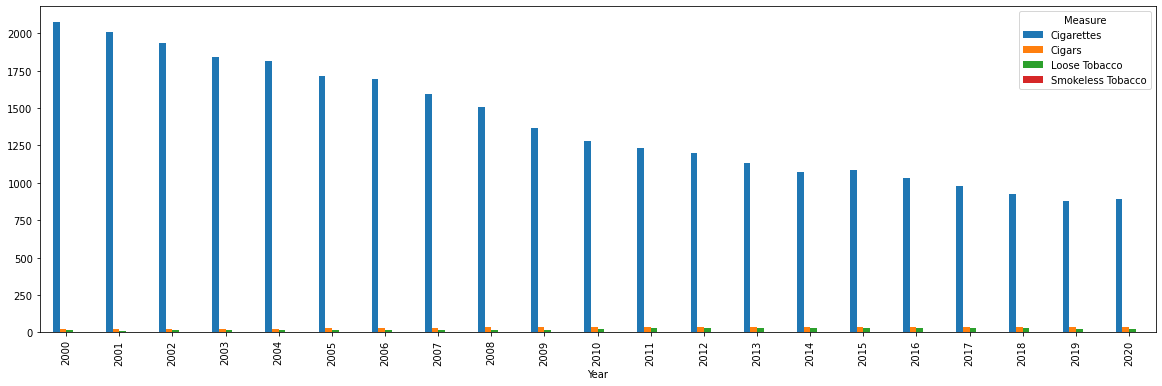

In [19]:
TobaccoConsumptionDF[['Year','Measure','Total Per Capita']].loc[TobaccoConsumptionDF.loc[:,'Measure'] != 'All Combustibles'].pivot_table(index='Year',columns='Measure', values='Total Per Capita').plot(kind='bar',figsize=(20, 6))

#### Distribution PerCapita (domestic and imports) by Measure

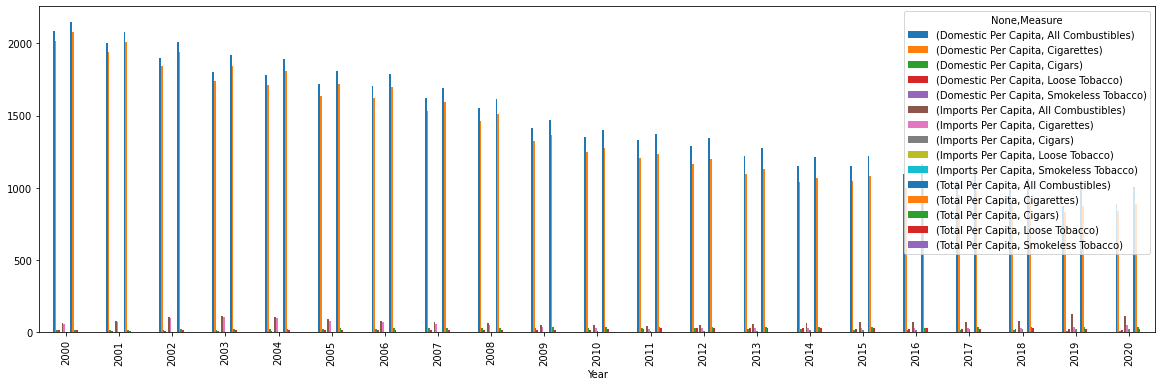

In [20]:
TobaccoConsumptionDF[['Year','Measure','Domestic Per Capita','Imports Per Capita','Total Per Capita']].pivot_table(index='Year',columns='Measure', values=['Domestic Per Capita','Imports Per Capita','Total Per Capita']).plot(kind='bar',figsize=(20, 6))

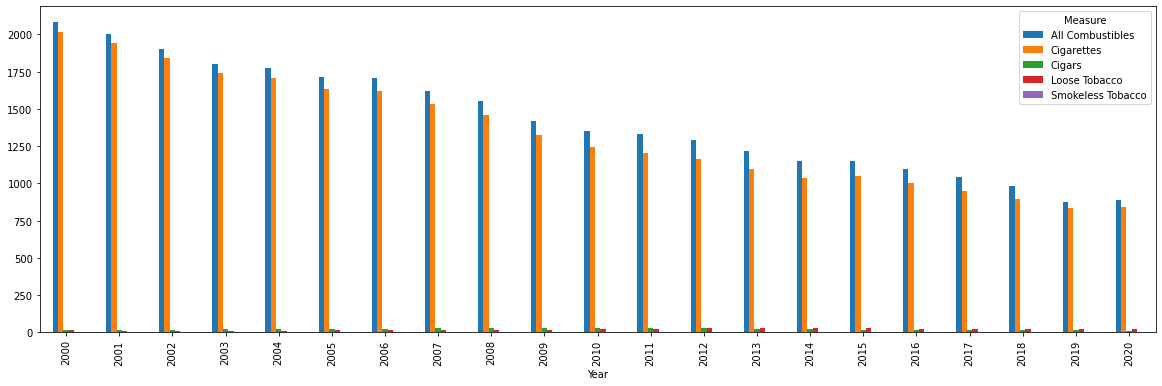

In [21]:
TobaccoConsumptionDF[['Year','Measure','Domestic Per Capita']].pivot_table(index='Year',columns='Measure', values='Domestic Per Capita').plot(kind='bar',figsize=(20, 6))

Text(0, 0.5, 'Measure')

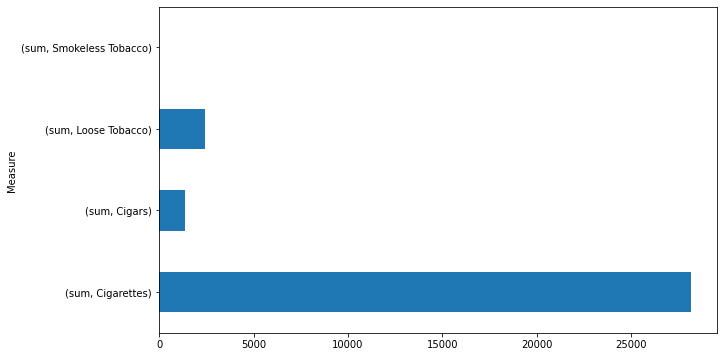

In [22]:
TobaccoConsumptionDF[['Measure','Domestic Per Capita']].loc[TobaccoConsumptionDF.loc[:,'Measure'] != 'All Combustibles'].groupby('Measure')['Domestic Per Capita'].agg([np.sum]).unstack().plot.barh(figsize=(10,6))
plt.ylabel("Measure")

In [24]:
TobaccoConsumptionDF.pivot_table(index='Year', columns='Submeasure', values='Total Per Capita')

Submeasure,Chewing Tobacco,Cigarette Removals,Large Cigars,Pipe Tobacco,Roll-Your-Own Tobacco,Small Cigars,Snuff,Total Cigars,Total Combustible Tobacco,Total Loose Tobacco
Year,,,,,,,,,,
2000,0.217,2076.0,19.0,7.000,14.5000,11.000,0.315,29.0,2148.0,21.5000
2001,0.233,2010.0,19.0,7.000,11.0000,11.000,0.329,30.0,2075.0,18.0000
2002,0.220,1936.0,20.0,6.500,13.5000,11.000,0.332,30.0,2006.0,20.0000
2003,0.212,1844.0,21.0,5.500,14.5000,11.000,0.344,32.0,1916.0,20.0000
2004,0.197,1811.0,22.0,5.500,15.0000,13.000,0.355,36.0,1888.0,20.5000
2005,0.177,1717.0,23.0,5.500,19.5000,18.000,0.361,41.0,1807.0,25.0000
2006,0.174,1695.0,24.0,5.000,19.0000,20.000,0.386,43.0,1787.0,24.5000
2007,0.155,1591.0,24.0,5.500,20.5000,23.000,0.389,47.0,1690.0,26.0000
2008,0.145,1507.0,25.0,5.500,23.5000,26.000,0.412,50.0,1615.0,29.0000


#### Tobacco Consumption by Year

In [26]:
TotalPerCapitaTS = TobaccoConsumptionDF[['Year','Total Per Capita']].groupby('Year').mean()
TotalPerCapitaTS 

,Total Per Capita
Year,
2000,336.117846
2001,324.427846
2002,314.119385
2003,300.350462
2004,296.350154
2005,285.118308
2006,282.043077
2007,267.657231
2008,256.889000


Text(0.5, 1.0, 'Consumption Average Per Capita by Years, 2000 - 2020')

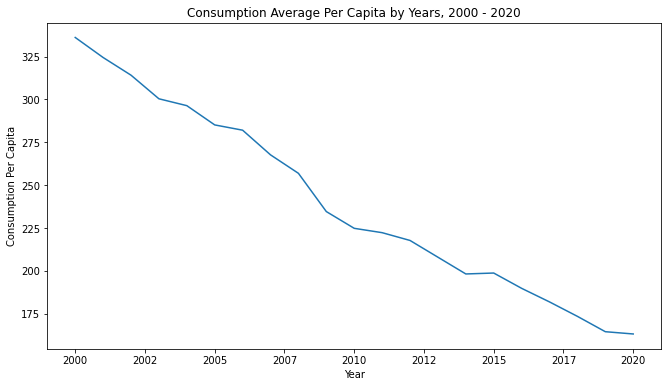

In [27]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

TotalPerCapitaTS['Total Per Capita'].plot(figsize=(11, 6))
plt.xlabel("Year")
plt.ylabel("Consumption Per Capita")
plt.title("Consumption Average Per Capita by Years, 2000 - 2020")

As can be seen, the average total tobacco consumption per capita shows a downward trend.

Submeasure
Cigarette Removals           AxesSubplot(0.125,0.125;0.775x0.755)
Large Cigars                 AxesSubplot(0.125,0.125;0.775x0.755)
Pipe Tobacco                 AxesSubplot(0.125,0.125;0.775x0.755)
Roll-Your-Own Tobacco        AxesSubplot(0.125,0.125;0.775x0.755)
Small Cigars                 AxesSubplot(0.125,0.125;0.775x0.755)
Total Cigars                 AxesSubplot(0.125,0.125;0.775x0.755)
Total Combustible Tobacco    AxesSubplot(0.125,0.125;0.775x0.755)
Total Loose Tobacco          AxesSubplot(0.125,0.125;0.775x0.755)
Name: Total Per Capita, dtype: object

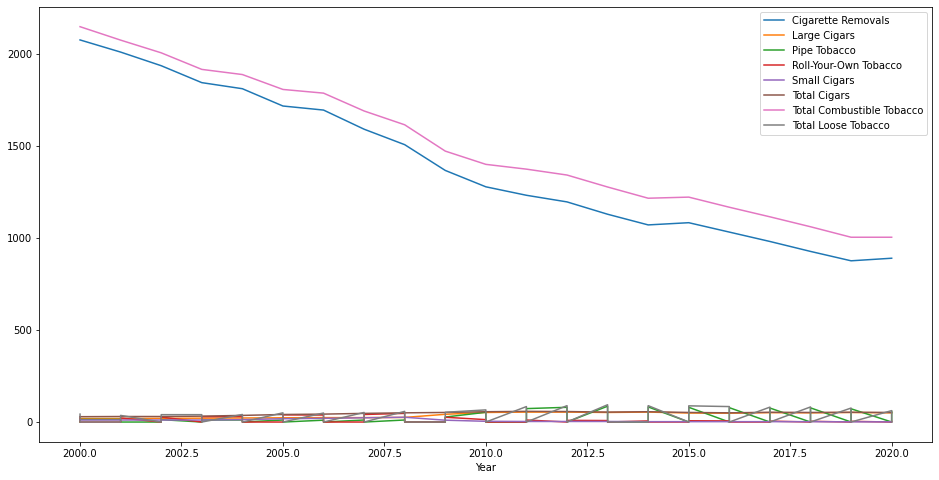

In [28]:
plt.figure(figsize=(16,8))
CombustibleTobaccoConsumptionbySubmeasureDF = TobaccoConsumptionDF[['Year','Topic','Submeasure','Total Per Capita']].loc[TobaccoConsumptionDF['Topic'] == "Combustible Tobacco"].set_index("Year")
CombustibleTobaccoConsumptionbySubmeasureDF.drop('Topic', axis='columns', inplace=True)
CombustibleTobaccoConsumptionbySubmeasureDF.groupby('Submeasure')["Total Per Capita"].plot(legend=True)

How can we analyze the behavior of the different sub-measures of the type of tobacco: combustible tobacco shows the same downward trend, with the Cigarette Removals type being the one with the greatest contribution.

Submeasure
Large Cigars             AxesSubplot(0.125,0.125;0.775x0.755)
Pipe Tobacco             AxesSubplot(0.125,0.125;0.775x0.755)
Roll-Your-Own Tobacco    AxesSubplot(0.125,0.125;0.775x0.755)
Small Cigars             AxesSubplot(0.125,0.125;0.775x0.755)
Total Cigars             AxesSubplot(0.125,0.125;0.775x0.755)
Total Loose Tobacco      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Total Per Capita, dtype: object

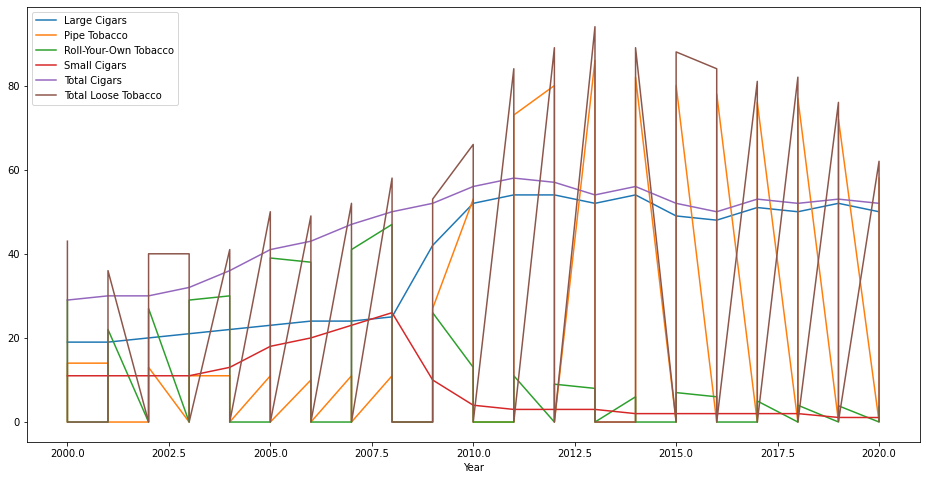

In [29]:
plt.figure(figsize=(16,8))
CombustibleTobaccoConsumptionbySubmeasureDF = TobaccoConsumptionDF[['Year','Topic','Submeasure','Total Per Capita']].loc[TobaccoConsumptionDF['Topic'] == "Combustible Tobacco"].set_index("Year")
CombustibleTobaccoConsumptionbySubmeasureDF = CombustibleTobaccoConsumptionbySubmeasureDF.loc[CombustibleTobaccoConsumptionbySubmeasureDF['Submeasure'] != "Total Combustible Tobacco"]
CombustibleTobaccoConsumptionbySubmeasureDF = CombustibleTobaccoConsumptionbySubmeasureDF.loc[CombustibleTobaccoConsumptionbySubmeasureDF['Submeasure'] != "Cigarette Removals"]
CombustibleTobaccoConsumptionbySubmeasureDF.drop('Topic', axis='columns', inplace=True)
CombustibleTobaccoConsumptionbySubmeasureDF.groupby('Submeasure')["Total Per Capita"].plot(legend=True)

## Machine Learning Model

To predict the cigarettes consumption for 2021 we are using the SARIMAX model as we saw in class. First we need to prepare the time series. From the original dataset we are selecting the 'Year' and 'Total' columns, taking only the rows where 'Measure' is 'Cigarettes.

In [30]:
CigarettesConsumptionDF = TobaccoConsumptionDF[["Year", "Measure", "Total"]].loc[TobaccoConsumptionDF["Measure"] == "Cigarettes"]
CigarettesConsumptionDF.drop('Measure', axis='columns', inplace=True)
CigarettesConsumptionDF

,Year,Total
1,2000,4.355700e+11
17,2001,4.267200e+11
38,2002,4.157240e+11
51,2003,4.003270e+11
54,2004,3.976550e+11
76,2005,3.810980e+11
82,2006,3.805940e+11
97,2007,3.615900e+11
109,2008,3.464200e+11
126,2009,3.177360e+11


The next step is to select 'Year' as the index of our time series, and convert its values to datetime.

In [31]:
from datetime import datetime
CigarettesConsumptionDF['Year']=pd.to_datetime(CigarettesConsumptionDF['Year'], format='%Y')
CigarettesConsumptionDF.set_index('Year', inplace=True)

#check datatype of index
CigarettesConsumptionDF.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

Now we can train our model with the data from the time series.

In [32]:
# fit model
model = SARIMAX(CigarettesConsumptionDF['Total'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


With the model ready we can predict the cigarettes consumption for 2021.

In [33]:
# make prediction
yhat = model_fit.predict(len(CigarettesConsumptionDF), len(CigarettesConsumptionDF))
print("Prediction of cigarette consumption for 2021: " + str(round(yhat.values[0])) + " Cigarettes")

Prediction of cigarette consumption for 2021: 226674854356 Cigarettes


We can also compare the predictions with real values of the time series by plotting them.

In [34]:
predictions = []
for i in range(len(CigarettesConsumptionDF)+1):
  predictions.append(model_fit.predict(i,i))
predictions = np.array(predictions)

In [39]:
years, cigarettes = np.array([i for i in range(2000,2021)]), CigarettesConsumptionDF['Total'].to_numpy()

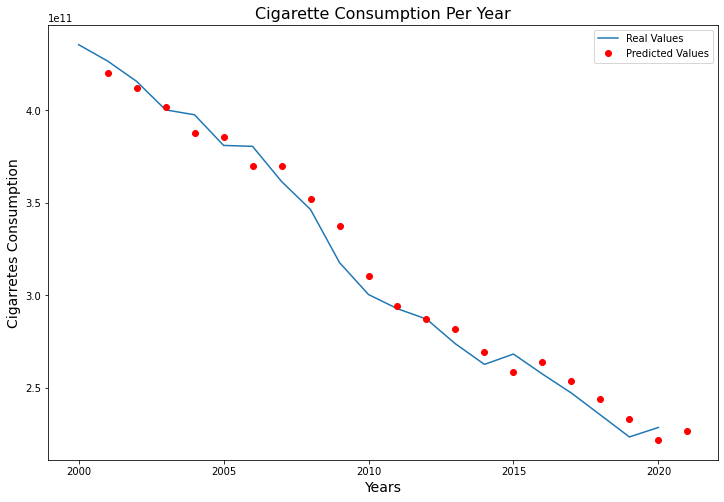

In [41]:
plt.figure(figsize=(12,8))
plt.plot(years, cigarettes, label="Real Values")
plt.plot(np.append(years,2021)[1:],predictions[1:],'or', label="Predicted Values")
plt.xlabel('Years', fontsize=14)
plt.ylabel('Cigarretes Consumption', fontsize=14)
plt.title('Cigarette Consumption Per Year', fontsize=16)
plt.legend()
plt.show()

In [42]:
#convert to time series:
ts = CigarettesConsumptionDF['Total']
ts.head(10)

Year
2000-01-01    4.355700e+11
2001-01-01    4.267200e+11
2002-01-01    4.157240e+11
2003-01-01    4.003270e+11
2004-01-01    3.976550e+11
2005-01-01    3.810980e+11
2006-01-01    3.805940e+11
2007-01-01    3.615900e+11
2008-01-01    3.464200e+11
2009-01-01    3.177360e+11
Name: Total, dtype: float64

In [43]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(4).mean()
    rolstd = timeseries.rolling(4).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

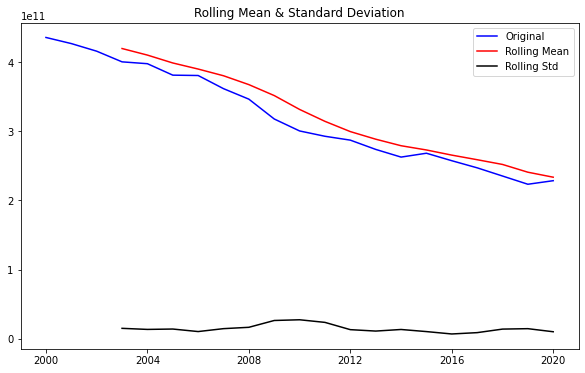

Results of Dickey-Fuller Test:
Test Statistic                 -4.024654
p-value                         0.001287
#Lags Used                      8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [44]:
plt.figure(figsize=(10,6))
test_stationarity(ts)